In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [3]:
transform=transforms.ToTensor()

In [4]:
# Hyper-parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

In [5]:
trainset = datasets.MNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.MNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [6]:
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size, shuffle=True
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size, shuffle=False
)

In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [8]:
images[0].shape

torch.Size([1, 28, 28])

In [9]:
print(labels)

tensor([3, 3, 1, 2, 4, 3, 4, 5, 6, 9, 3, 7, 3, 1, 5, 9, 4, 1, 0, 7, 7, 2, 2, 8,
        1, 8, 8, 9, 2, 8, 9, 2, 8, 2, 7, 2, 0, 6, 4, 0, 4, 5, 7, 1, 5, 7, 7, 4,
        2, 3, 8, 5, 3, 3, 8, 1, 6, 8, 4, 4, 0, 2, 4, 1, 8, 8, 4, 4, 8, 6, 6, 5,
        1, 0, 8, 9, 2, 8, 6, 5, 0, 1, 9, 4, 3, 1, 2, 9, 9, 4, 6, 8, 0, 4, 1, 9,
        3, 7, 6, 2])


In [10]:
CLASSES = {
    0: 'zero',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

three
three
one
two
four
three
four
five
six
nine
three
seven
three
one
five
nine
four
one
zero
seven
seven
two
two
eight
one
eight
eight
nine
two
eight
nine
two
eight
two
seven
two
zero
six
four
zero
four
five
seven
one
five
seven
seven
four
two
three
eight
five
three
three
eight
one
six
eight
four
four
zero
two
four
one
eight
eight
four
four
eight
six
six
five
one
zero
eight
nine
two
eight
six
five
zero
one
nine
four
three
one
two
nine
nine
four
six
eight
zero
four
one
nine
three
seven
six
two


(28, 28)


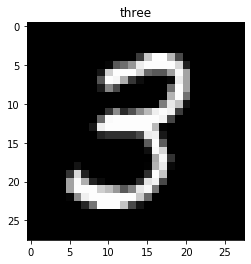

In [11]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

In [12]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(784, 256)
#         self.fc2 = nn.Linear(256, 128)
#         self.fc3 = nn.Linear(128, 10)

#     def forward(self, x):
#         x = x.view(-1, 784)
# #         x = F.relu(self.fc1(x))
# #         x = F.relu(self.fc2(x))        
#         x = torch.sigmoid(self.fc1(x))
#         x = torch.sigmoid(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [13]:
# class Net(nn.Module):
#     def __init__(self, dropout_p=0.2):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(784, 256)
#         self.fc2 = nn.Linear(256, 128)
#         self.fc3 = nn.Linear(128, 10)
#         # 드롭아웃 확률
#         self.dropout_p = dropout_p

#     def forward(self, x):
#         x = x.view(-1, 784)
#         x = F.relu(self.fc1(x))
#         # 드롭아웃 추가
#         x = F.dropout(x, training=self.training,
#                       p=self.dropout_p)
#         x = F.relu(self.fc2(x))
#         # 드롭아웃 추가
#         x = F.dropout(x, training=self.training,
#                       p=self.dropout_p)
#         x = self.fc3(x)
#         return x

In [14]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
#         self.conv2_drop = nn.Dropout2d(p=0.2)
#         self.fc1 = nn.Linear(320, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = x.view(-1, 320)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1)

In [15]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
#         self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu')
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
#         self.gru.flatten_parameters()

        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE) 
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)
        
        # Forward propagate LSTM
#         out, hn = self.rnn(x, h0)
#         out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        out, _ = self.gru(x, h0)  # out: tensor of shape (batch_size, seq_length, hidden_size)        
                
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [16]:
model = RNN(input_size, hidden_size, num_layers, num_classes).to(DEVICE)

In [17]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(DEVICE)
        labels = labels.to(DEVICE)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/2], Step [100/600], Loss: 0.3131
Epoch [1/2], Step [200/600], Loss: 0.1131
Epoch [1/2], Step [300/600], Loss: 0.1034
Epoch [1/2], Step [400/600], Loss: 0.2148
Epoch [1/2], Step [500/600], Loss: 0.1013
Epoch [1/2], Step [600/600], Loss: 0.1097
Epoch [2/2], Step [100/600], Loss: 0.1268
Epoch [2/2], Step [200/600], Loss: 0.0478
Epoch [2/2], Step [300/600], Loss: 0.0504
Epoch [2/2], Step [400/600], Loss: 0.0255
Epoch [2/2], Step [500/600], Loss: 0.1516
Epoch [2/2], Step [600/600], Loss: 0.1082


In [19]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(DEVICE)
        labels = labels.to(DEVICE)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 

Test Accuracy of the model on the 10000 test images: 95.73 %


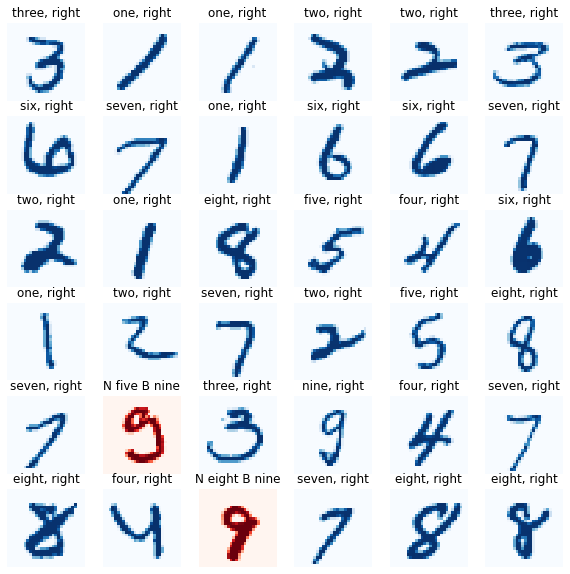

In [20]:
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))
 
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(testset))
    input_img = testset[data_idx][0].reshape(-1, sequence_length, input_size).to(DEVICE)
 
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = CLASSES[argmax.item()]
    label = CLASSES[testset[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right')
        cmap = 'Blues'
    else:
        plt.title('N ' + pred + ' B ' +  label)
        cmap = 'Reds'
    plot_img = testset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 

In [29]:
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as f

class DataLoader:
    def get_train_data(batch_size):
        return torch.utils.data.DataLoader(
            datasets.MNIST(
                './.data',
                train=True,
                download=True,
                transform=transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,))
                ])),
            batch_size=batch_size,
            shuffle=True)

    def get_test_data(test_batch_size):
        return torch.utils.data.DataLoader(
            datasets.MNIST(
                './.data',
                train=False,
                transform=transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,))
                ])),
            batch_size=test_batch_size,
            shuffle=True)

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

In [31]:
class CnnLstm(nn.Module):
    def __init__(self):
        super(CnnLstm, self).__init__()
        self.cnn = CNN()
        self.rnn = nn.LSTM(
            input_size=1568,
            hidden_size=64,
            num_layers=1,
            batch_first=True)
        self.linear = nn.Linear(64, 10)

    def forward(self, x):
        batch_size, time_steps, channels, height, width = x.size()
        c_in = x.view(batch_size * time_steps, channels, height, width)
        _, c_out = self.cnn(c_in)
        r_in = c_out.view(batch_size, time_steps, -1)
        r_out, (_, _) = self.rnn(r_in)
        r_out2 = self.linear(r_out[:, -1, :])
        return f.log_softmax(r_out2, dim=1)

In [35]:
class TrainCNNLSTM:
    def __init__(self):
        self.seed = 1
        self.batch_size = 50
        self.test_batch_size = 1000
        self.epoch = 1
        self.learning_rate = 0.01
        self.step = 100
        self.train_loader = None
        self.test_loader = None
        self.model = CnnLstm()

    def load_data(self):
        data_loader = DataLoader()
        self.train_loader = data_loader.get_train_data(self.batch_size)
        self.test_loader = data_loader.get_test_data(self.test_batch_size)

    def train(self):
        optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
        for iteration, (data, target) in enumerate(self.train_loader):

            data = np.expand_dims(data, axis=1)
            data = torch.FloatTensor(data)

            data, target = Variable(data), Variable(target)
            optimizer.zero_grad()
            output = self.model(data)
            loss = f.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            if iteration % self.step == 0:
                print('Epoch: {} | train loss: {:.4f}'.format(
                    self.epoch, loss.item()))

    def test(self):
        test_loss = 0
        correct = 0
        for data, target in self.test_loader:
            data = np.expand_dims(data, axis=1)
            data = torch.FloatTensor(data)
            print(target.size)

            data, target = Variable(data, volatile=True), Variable(target)
            output = self.model(data)
            test_loss += f.nll_loss(
                output, target, size_average=False).item()  # sum up batch loss
            pred = torch.max(output, 1)[1].data.squeeze()
            correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

        test_loss /= len(self.test_loader.dataset)
        print(
            '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                test_loss, correct, len(self.test_loader.dataset),
                100. * correct / len(self.test_loader.dataset)))


train = TrainCNNLSTM()
train.load_data()
train.train()
train.test()